# Lab 05: K-Mean Clustering
## Sklearn

In [ ]:
## data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/lab_05_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Bài tập
- Hãy cài đặt lại KMeans Cluster Algorithm mô tả trong Lec05_Unsupervised_KMeans, slide 14 của thầy. Chủ yếu dùng numpy để tính toán nhé.
- Hãy lưu lại tổng within-cluster-variation của mọi clusters sau mỗi vòng lặp để vẽ hình

Kết quả cuối cùng tương tự như:

<img src="/content/gdrive/MyDrive/lab_05_fig.jpg" width="50%" height="50%">


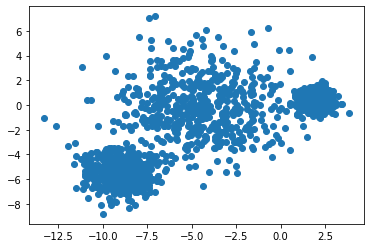

In [ ]:
X = df[["x1", "x2"]].values
plt.scatter(X[:,0], X[:,1])

Sum of squared distances of samples to their closest cluster center:  5747.987366346273


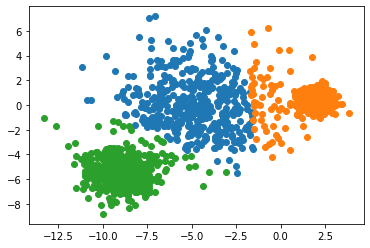

In [ ]:
kmean = KMeans(n_clusters=3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
    plt.scatter(X[:,0][clusters==ii], X[:,1][clusters==ii])
print("Sum of squared distances of samples to their closest cluster center: ", kmean.inertia_)

## Bài tập
- Hãy cài đặt lại KMeans Cluster Algorithm mô tả trong Lec05_Unsupervised_KMeans, slide 14 của thầy. Chủ yếu dùng numpy để tính toán nhé.
- Hãy lưu lại tổng within-cluster-variation của mọi clusters sau mỗi vòng lặp để vẽ hình

Kết quả cuối cùng tương tự như:

<img src="/content/gdrive/MyDrive/fig.jpg" width="50%" height="50%">


## Random Label

In [ ]:
K = 3
n = df.shape[0]
df['label'] = np.random.randint(0, K, n)
df

,x1,x2,label
0,-6.111197,1.471531,2
1,-7.496654,0.913425,2
2,-10.844898,-7.553523,1
3,-4.543377,-2.135686,2
4,-1.913821,-0.034780,0
...,...,...,...
1495,-8.527192,-6.726876,0
1496,-3.271435,2.243791,1
1497,1.649903,-0.201178,1
1498,0.792307,0.608689,0


In [ ]:
def eucl_distance(point, data):
  return np.sqrt(np.sum((point - data)**2, axis=1))

def cal_centroids(df):
  return df.groupby('label').agg('mean').loc[:,['x1', 'x2']].reset_index(drop = True)

In [ ]:
def plots(df,centroids):
  colors = {0:'orange', 1:'green', 2:'blue'}
  plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c = df.iloc[:,2].apply(lambda x: colors[x]), alpha = 0.5)
  plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = 'x', s = 200, c = 'red')
  plt.show()

## Init Label + Cal centroids

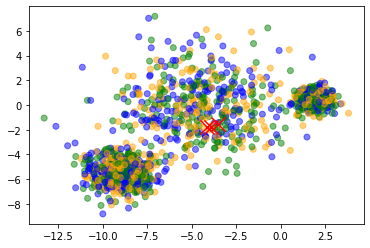

In [ ]:
distances = []
centroids = cal_centroids(df)
for i in range(n):
  distance = np.sqrt(np.sum((df.iloc[i, :2] - centroids.iloc[df.loc[i, 'label'], :]) **2))
  distances.append(distance)
df['distances'] = distances
plots(df,centroids)

In [ ]:
distances_list = []
while True:
  for i in range(n):
    centroids = cal_centroids(df)
    distances = eucl_distance(df.iloc[i, :2], centroids)
    distance_min_index = np.argmin(distances)
    df.at[i, 'label'] = distance_min_index
    df.at[i, 'distances'] = distances[distance_min_index]
    distances_list.append(df['distances'].sum())

    centroids_final = cal_centroids(df)
    if(i%100 == 0):
      plots(df,centroids)
  if np.equal(centroids.values, centroids_final.values).all(): break

Output hidden; open in https://colab.research.google.com to view.

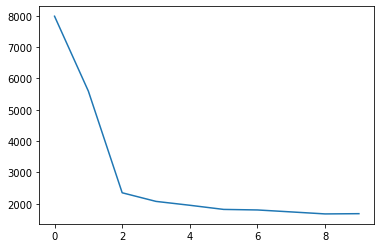

In [64]:
WCVs = []
for i in range(1,11):
  Z = i
  df['label'] = np.random.randint(0, Z, n)

  while True:
    for i in range(n):
      centroids = cal_centroids(df)
      distances = eucl_distance(df.iloc[i, :2], centroids)
      distance_min_index = np.argmin(distances)
      df.at[i, 'label'] = distance_min_index
      df.at[i, 'distances'] = distances[distance_min_index]
      distances_list.append(df['distances'].sum())
      centroids_final = cal_centroids(df)
    if np.equal(centroids.values, centroids_final.values).all(): break
  WCVs.append(df['distances'].sum())
plt.plot(WCVs)
plt.show()